In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [314]:
df = pd.read_csv("/content/archive__.csv")

In [315]:
df.head(5)

,time,temperature_2m,relativehumidity_2m_precent,rain_(mm),cloudcover_precent,direct_radiation,windspeed_10m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm
0,2022-01-01T00:00,10.5,86,0.0,0,0,8.0,9.3,0.397
1,2022-01-01T01:00,9.4,88,0.0,0,0,8.5,8.8,0.397
2,2022-01-01T02:00,9.5,86,0.0,0,0,13.4,8.5,0.397
3,2022-01-01T03:00,9.7,84,0.0,1,0,12.6,8.8,0.397
4,2022-01-01T04:00,9.4,84,0.0,1,0,12.6,8.6,0.397


In [316]:
df.shape

(8760, 9)

In [317]:
df_average = pd.read_csv("/content/average_.csv")

In [318]:
df_average.tail(5)

,time,temperature_2m_max,temperature_2m_min,temperature_2m_mean,rain_sum,windspeed_10m_max
360,12/27/2022,15.2,11.1,13.6,3.3,17.8
361,12/28/2022,14.1,9.1,11.8,1.3,8.7
362,12/29/2022,13.7,9.0,12.1,1.5,23.9
363,12/30/2022,14.8,12.3,13.4,0.2,24.8
364,12/31/2022,15.2,11.5,13.4,0.0,18.5


In [319]:
import itertools

In [320]:
SAMPLE_SIZE = 24
label_series = pd.Series(itertools.chain.from_iterable(itertools.repeat(x, SAMPLE_SIZE) for x in df.index), )
sampled_df = df.groupby(label_series).mean()

<ipython-input-320-c33ff1cdda36>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [321]:
sampled_df.head(5)

,temperature_2m,relativehumidity_2m_precent,rain_(mm),cloudcover_precent,direct_radiation,windspeed_10m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm
0,11.716667,80.166667,0.000000,2.958333,58.041667,10.937500,10.575000,0.395083
1,11.741667,80.416667,0.000000,3.583333,62.375000,6.320833,10.437500,0.390833
2,10.900000,82.333333,0.000000,72.708333,15.333333,3.720833,9.179167,0.388208
3,11.383333,84.833333,0.025000,74.875000,19.416667,19.058333,10.337500,0.385750
4,13.737500,87.375000,0.091667,54.208333,29.208333,33.250000,12.545833,0.388875


In [322]:
sampled_df.shape

(365, 8)

In [323]:
sampled_df.dtypes

temperature_2m                 float64
relativehumidity_2m_precent    float64
rain_(mm)                      float64
cloudcover_precent             float64
direct_radiation               float64
windspeed_10m                  float64
soil_temperature_0_to_7cm      float64
soil_moisture_0_to_7cm         float64
dtype: object

In [324]:
import math

In [325]:
for x in sampled_df["windspeed_10m"]:
  x = x*4.87/(math.log(67.8*10-5.42))

# **Wind speed**

Mijenjam windspeed s 10 metara na 2

# \begin{equation}
u_2 = u_{10} * 4.87/(\ln(67.8 * 10 - 5.42)
\end{equation}



In [326]:
sampled_df["windspeed_10m"] = sampled_df["windspeed_10m"]*4.87/(math.log(67.8*10-5.42))

In [327]:
sampled_df.rename(columns = {'windspeed_10m':'windspeed_2m'}, inplace = True)

In [328]:
sampled_df.head(5)

,temperature_2m,relativehumidity_2m_precent,rain_(mm),cloudcover_precent,direct_radiation,windspeed_2m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm
0,11.716667,80.166667,0.000000,2.958333,58.041667,8.180715,10.575000,0.395083
1,11.741667,80.416667,0.000000,3.583333,62.375000,4.727674,10.437500,0.390833
2,10.900000,82.333333,0.000000,72.708333,15.333333,2.783001,9.179167,0.388208
3,11.383333,84.833333,0.025000,74.875000,19.416667,14.254701,10.337500,0.385750
4,13.737500,87.375000,0.091667,54.208333,29.208333,24.869373,12.545833,0.388875


# **Slope of saturation vapor pressure curve**

# \begin{equation}
\Delta = 4098 \left[\frac{0.6108exp(\frac{17.27*T_{mean}}{T_{mean} + 237.3})}{(T_{mean}+273.3)^2}\right]
\end{equation}
\begin{equation}
exp = 2.7183
\end{equation}

In [329]:
sampled_df["slope_saturation"] = pd.Series()

<ipython-input-329-6c28da8deb46>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [330]:
sampled_df["slope_saturation"]=(4098*(0.6108*2.7183*((17.27*sampled_df["temperature_2m"])/(sampled_df["temperature_2m"]+237.3))))/(sampled_df["temperature_2m"]+273.3)**2

In [331]:
sampled_df.head(5)

,temperature_2m,relativehumidity_2m_precent,rain_(mm),cloudcover_precent,direct_radiation,windspeed_2m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm,slope_saturation
0,11.716667,80.166667,0.000000,2.958333,58.041667,8.180715,10.575000,0.395083,0.068061
1,11.741667,80.416667,0.000000,3.583333,62.375000,4.727674,10.437500,0.390833,0.068187
2,10.900000,82.333333,0.000000,72.708333,15.333333,2.783001,9.179167,0.388208,0.063891
3,11.383333,84.833333,0.025000,74.875000,19.416667,14.254701,10.337500,0.385750,0.066368
4,13.737500,87.375000,0.091667,54.208333,29.208333,24.869373,12.545833,0.388875,0.078046


# **Atmospheric Pressure (P)**


Nadmorska visina za ovaj skup podataka je 6.4m.

# \begin{equation}
P = 101.3  \left[\frac{293-0.00657z}{293}\right]^{5.26}
\end{equation}

z = elevation above sea level, m


In [332]:
sampled_df["atmospheric_pressure"] = pd.Series()

<ipython-input-332-52806c6d8a7e>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [333]:
sampled_df["atmospheric_pressure"] = 101.3*(((293-(0.00657*6.4))/293)**5.26)

In [334]:
sampled_df.head(5)

,temperature_2m,relativehumidity_2m_precent,rain_(mm),cloudcover_precent,direct_radiation,windspeed_2m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm,slope_saturation,atmospheric_pressure
0,11.716667,80.166667,0.000000,2.958333,58.041667,8.180715,10.575000,0.395083,0.068061,101.223557
1,11.741667,80.416667,0.000000,3.583333,62.375000,4.727674,10.437500,0.390833,0.068187,101.223557
2,10.900000,82.333333,0.000000,72.708333,15.333333,2.783001,9.179167,0.388208,0.063891,101.223557
3,11.383333,84.833333,0.025000,74.875000,19.416667,14.254701,10.337500,0.385750,0.066368,101.223557
4,13.737500,87.375000,0.091667,54.208333,29.208333,24.869373,12.545833,0.388875,0.078046,101.223557


# **Psychrometric constant (³)**

# \begin{equation}
\gamma = \frac{C_p P}{\varepsilon \lambda} = 0.000665 * P
\end{equation}

P = Atmospheric Pressure

In [335]:
sampled_df["psychrometric_constant"] = pd.Series()

<ipython-input-335-c6e4e14ff3aa>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [336]:
sampled_df["psychrometric_constant"] = 0.000665 * sampled_df["atmospheric_pressure"]

In [337]:
sampled_df.head(5)

,temperature_2m,relativehumidity_2m_precent,rain_(mm),cloudcover_precent,direct_radiation,windspeed_2m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm,slope_saturation,atmospheric_pressure,psychrometric_constant
0,11.716667,80.166667,0.000000,2.958333,58.041667,8.180715,10.575000,0.395083,0.068061,101.223557,0.067314
1,11.741667,80.416667,0.000000,3.583333,62.375000,4.727674,10.437500,0.390833,0.068187,101.223557,0.067314
2,10.900000,82.333333,0.000000,72.708333,15.333333,2.783001,9.179167,0.388208,0.063891,101.223557,0.067314
3,11.383333,84.833333,0.025000,74.875000,19.416667,14.254701,10.337500,0.385750,0.066368,101.223557,0.067314
4,13.737500,87.375000,0.091667,54.208333,29.208333,24.869373,12.545833,0.388875,0.078046,101.223557,0.067314


# **Delta Term (DT) (auxiliary calculation for Radiation Term)**

# \begin{equation}
DT = \frac{\Delta}{\gamma(1+0.34u_2)}
\end{equation}
u2 = wind speed 2 m above the ground surface



In [338]:
sampled_df["delta_term"] = pd.Series()

<ipython-input-338-3c5b81b9b81a>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [339]:
sampled_df["delta_term"] = sampled_df["slope_saturation"]/(sampled_df["psychrometric_constant"]*(1+0.34*sampled_df["windspeed_2m"]))

In [340]:
sampled_df.head(5)

,temperature_2m,relativehumidity_2m_precent,rain_(mm),cloudcover_precent,direct_radiation,windspeed_2m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm,slope_saturation,atmospheric_pressure,psychrometric_constant,delta_term
0,11.716667,80.166667,0.000000,2.958333,58.041667,8.180715,10.575000,0.395083,0.068061,101.223557,0.067314,0.267384
1,11.741667,80.416667,0.000000,3.583333,62.375000,4.727674,10.437500,0.390833,0.068187,101.223557,0.067314,0.388498
2,10.900000,82.333333,0.000000,72.708333,15.333333,2.783001,9.179167,0.388208,0.063891,101.223557,0.067314,0.487688
3,11.383333,84.833333,0.025000,74.875000,19.416667,14.254701,10.337500,0.385750,0.066368,101.223557,0.067314,0.168637
4,13.737500,87.375000,0.091667,54.208333,29.208333,24.869373,12.545833,0.388875,0.078046,101.223557,0.067314,0.122620


# **Psi Term (PT) (auxiliary calculation for Wind Term)**

# \begin{equation}
PT = \frac{\gamma}{\Delta + \gamma(1+0.34u_2)}
\end{equation}

In [341]:
sampled_df["psi_term"] = pd.Series()

<ipython-input-341-1e5c1ce5118e>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [342]:
sampled_df["psi_term"] = sampled_df["psychrometric_constant"]/(sampled_df["slope_saturation"]+sampled_df["psychrometric_constant"]*(1+0.34*sampled_df["windspeed_2m"]))

In [343]:
sampled_df.head(5)

,temperature_2m,relativehumidity_2m_precent,rain_(mm),cloudcover_precent,direct_radiation,windspeed_2m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm,slope_saturation,atmospheric_pressure,psychrometric_constant,delta_term,psi_term
0,11.716667,80.166667,0.000000,2.958333,58.041667,8.180715,10.575000,0.395083,0.068061,101.223557,0.067314,0.267384,0.208658
1,11.741667,80.416667,0.000000,3.583333,62.375000,4.727674,10.437500,0.390833,0.068187,101.223557,0.067314,0.388498,0.276214
2,10.900000,82.333333,0.000000,72.708333,15.333333,2.783001,9.179167,0.388208,0.063891,101.223557,0.067314,0.487688,0.345379
3,11.383333,84.833333,0.025000,74.875000,19.416667,14.254701,10.337500,0.385750,0.066368,101.223557,0.067314,0.168637,0.146358
4,13.737500,87.375000,0.091667,54.208333,29.208333,24.869373,12.545833,0.388875,0.078046,101.223557,0.067314,0.122620,0.094206


# **Temperature Term (TT) (auxiliary calculation for Wind Term)**

# \begin{equation}
TT = \left[\frac{900}{T_{mean} + 273}\right]*u_2
\end{equation}

In [344]:
sampled_df["temperature_term"] = pd.Series()

<ipython-input-344-c3f56982c9bb>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [345]:
sampled_df["temperature_term"] = (900/(sampled_df["temperature_2m"]+273))*sampled_df["windspeed_2m"]

In [346]:
sampled_df.head(5)

,temperature_2m,relativehumidity_2m_precent,rain_(mm),cloudcover_precent,direct_radiation,windspeed_2m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm,slope_saturation,atmospheric_pressure,psychrometric_constant,delta_term,psi_term,temperature_term
0,11.716667,80.166667,0.000000,2.958333,58.041667,8.180715,10.575000,0.395083,0.068061,101.223557,0.067314,0.267384,0.208658,25.859545
1,11.741667,80.416667,0.000000,3.583333,62.375000,4.727674,10.437500,0.390833,0.068187,101.223557,0.067314,0.388498,0.276214,14.943042
2,10.900000,82.333333,0.000000,72.708333,15.333333,2.783001,9.179167,0.388208,0.063891,101.223557,0.067314,0.487688,0.345379,8.822477
3,11.383333,84.833333,0.025000,74.875000,19.416667,14.254701,10.337500,0.385750,0.066368,101.223557,0.067314,0.168637,0.146358,45.112457
4,13.737500,87.375000,0.091667,54.208333,29.208333,24.869373,12.545833,0.388875,0.078046,101.223557,0.067314,0.122620,0.094206,78.058977


# **Mean saturation vapor pressure derived from air temperature(es**)

# \begin{equation}
e_T = 0.6108exp\left[\frac{17.27T}{T + 237.3}\right]
\end{equation}
\

# \begin{equation}
e_{(T_{max})} = 0.6108exp\left[\frac{17.27T_{max}}{T_{max} + 237.3}\right]
\end{equation}
\

# \begin{equation}
e_{(T_{min})} = 0.6108exp\left[\frac{17.27T_{min}}{T_{min} + 237.3}\right]
\end{equation}
\
# \begin{equation}
e_s = \frac{e_{(T_{max})} + e_{(T_{min})}}{2}
\end{equation}

Potrebno je izvući maksimalnu i minimalnu temperaturu u danu iz početnog dataseta.

In [347]:
SAMPLE_SIZE = 24
label_series = pd.Series(itertools.chain.from_iterable(itertools.repeat(x, SAMPLE_SIZE) for x in df.index), )
df_max = df.groupby(label_series).max()
df_max.rename(columns = {'temperature_2m':'max_temperature_2m'}, inplace = True)

In [348]:
df_max.head(5)

,time,max_temperature_2m,relativehumidity_2m_precent,rain_(mm),cloudcover_precent,direct_radiation,windspeed_10m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm
0,2022-01-01T23:00,16.8,88,0.0,24,284,13.8,14.3,0.397
1,2022-01-02T23:00,16.3,87,0.0,28,290,12.0,14.5,0.393
2,2022-01-03T23:00,12.7,87,0.0,100,94,8.7,12.2,0.389
3,2022-01-04T23:00,13.1,91,0.2,100,118,34.6,12.2,0.387
4,2022-01-05T23:00,14.8,92,0.2,85,181,38.0,13.7,0.391


In [349]:
SAMPLE_SIZE = 24
label_series = pd.Series(itertools.chain.from_iterable(itertools.repeat(x, SAMPLE_SIZE) for x in df.index), )
df_min = df.groupby(label_series).min()
df_min.rename(columns = {'temperature_2m':'min_temperature_2m'}, inplace = True)

In [350]:
df_min.head(5)

,time,min_temperature_2m,relativehumidity_2m_precent,rain_(mm),cloudcover_precent,direct_radiation,windspeed_10m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm
0,2022-01-01T00:00,8.4,66,0.0,0,0,7.6,8.3,0.393
1,2022-01-02T00:00,7.8,63,0.0,0,0,0.5,8.1,0.389
2,2022-01-03T00:00,8.3,78,0.0,33,0,1.1,6.9,0.387
3,2022-01-04T00:00,8.3,77,0.0,17,0,5.0,8.1,0.384
4,2022-01-05T00:00,13.0,78,0.0,33,0,28.2,11.7,0.387


In [351]:
sampled_df['max_temperature'] = df_max['max_temperature_2m'].to_numpy()
sampled_df['min_temperature'] = df_min['min_temperature_2m'].to_numpy()

In [352]:
sampled_df.head(5)

,temperature_2m,relativehumidity_2m_precent,rain_(mm),cloudcover_precent,direct_radiation,windspeed_2m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm,slope_saturation,atmospheric_pressure,psychrometric_constant,delta_term,psi_term,temperature_term,max_temperature,min_temperature
0,11.716667,80.166667,0.000000,2.958333,58.041667,8.180715,10.575000,0.395083,0.068061,101.223557,0.067314,0.267384,0.208658,25.859545,16.8,8.4
1,11.741667,80.416667,0.000000,3.583333,62.375000,4.727674,10.437500,0.390833,0.068187,101.223557,0.067314,0.388498,0.276214,14.943042,16.3,7.8
2,10.900000,82.333333,0.000000,72.708333,15.333333,2.783001,9.179167,0.388208,0.063891,101.223557,0.067314,0.487688,0.345379,8.822477,12.7,8.3
3,11.383333,84.833333,0.025000,74.875000,19.416667,14.254701,10.337500,0.385750,0.066368,101.223557,0.067314,0.168637,0.146358,45.112457,13.1,8.3
4,13.737500,87.375000,0.091667,54.208333,29.208333,24.869373,12.545833,0.388875,0.078046,101.223557,0.067314,0.122620,0.094206,78.058977,14.8,13.0


**T_max**

In [353]:
sampled_df["t_max_saturation"] = pd.Series()

<ipython-input-353-09bab2e4ff0a>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [354]:
sampled_df["t_min_saturation"] = pd.Series()

<ipython-input-354-75c5e16f436b>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [355]:
sampled_df["t_max_saturation"] = 0.6108 * 2.7183 * ((17.27*sampled_df['max_temperature'])/(sampled_df['max_temperature']+237.3))

In [356]:
sampled_df["t_min_saturation"] = 0.6108 * 2.7183 * ((17.27*sampled_df['min_temperature'])/(sampled_df['min_temperature']+237.3))

In [357]:
sampled_df.head(5)

,temperature_2m,relativehumidity_2m_precent,rain_(mm),cloudcover_precent,direct_radiation,windspeed_2m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm,slope_saturation,atmospheric_pressure,psychrometric_constant,delta_term,psi_term,temperature_term,max_temperature,min_temperature,t_max_saturation,t_min_saturation
0,11.716667,80.166667,0.000000,2.958333,58.041667,8.180715,10.575000,0.395083,0.068061,101.223557,0.067314,0.267384,0.208658,25.859545,16.8,8.4,1.895804,0.980309
1,11.741667,80.416667,0.000000,3.583333,62.375000,4.727674,10.437500,0.390833,0.068187,101.223557,0.067314,0.388498,0.276214,14.943042,16.3,7.8,1.843008,0.912515
2,10.900000,82.333333,0.000000,72.708333,15.333333,2.783001,9.179167,0.388208,0.063891,101.223557,0.067314,0.487688,0.345379,8.822477,12.7,8.3,1.456641,0.969033
3,11.383333,84.833333,0.025000,74.875000,19.416667,14.254701,10.337500,0.385750,0.066368,101.223557,0.067314,0.168637,0.146358,45.112457,13.1,8.3,1.500119,0.969033
4,13.737500,87.375000,0.091667,54.208333,29.208333,24.869373,12.545833,0.388875,0.078046,101.223557,0.067314,0.122620,0.094206,78.058977,14.8,13.0,1.683362,1.489262


In [358]:
sampled_df["t_mean_saturation"] = pd.Series()

<ipython-input-358-78b96d2f57e3>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [359]:
sampled_df["t_mean_saturation"] = (sampled_df["t_max_saturation"]+sampled_df["t_min_saturation"])/2

In [360]:
sampled_df.head(5)

,temperature_2m,relativehumidity_2m_precent,rain_(mm),cloudcover_precent,direct_radiation,windspeed_2m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm,slope_saturation,atmospheric_pressure,psychrometric_constant,delta_term,psi_term,temperature_term,max_temperature,min_temperature,t_max_saturation,t_min_saturation,t_mean_saturation
0,11.716667,80.166667,0.000000,2.958333,58.041667,8.180715,10.575000,0.395083,0.068061,101.223557,0.067314,0.267384,0.208658,25.859545,16.8,8.4,1.895804,0.980309,1.438056
1,11.741667,80.416667,0.000000,3.583333,62.375000,4.727674,10.437500,0.390833,0.068187,101.223557,0.067314,0.388498,0.276214,14.943042,16.3,7.8,1.843008,0.912515,1.377761
2,10.900000,82.333333,0.000000,72.708333,15.333333,2.783001,9.179167,0.388208,0.063891,101.223557,0.067314,0.487688,0.345379,8.822477,12.7,8.3,1.456641,0.969033,1.212837
3,11.383333,84.833333,0.025000,74.875000,19.416667,14.254701,10.337500,0.385750,0.066368,101.223557,0.067314,0.168637,0.146358,45.112457,13.1,8.3,1.500119,0.969033,1.234576
4,13.737500,87.375000,0.091667,54.208333,29.208333,24.869373,12.545833,0.388875,0.078046,101.223557,0.067314,0.122620,0.094206,78.058977,14.8,13.0,1.683362,1.489262,1.586312


# **Actual vapor pressure (ea) derived from relative humidity**

# \begin{equation}
e_a = \frac{RH_{mean}}{100}\left[\frac{e_{(T_{min})}+e_{(T_{max})}}{2}\right]
\end{equation}

In [361]:
sampled_df["vapor_pressure"] = pd.Series()

<ipython-input-361-391887431a32>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [362]:
sampled_df["vapor_pressure"] = (sampled_df["relativehumidity_2m_precent"]/100)*((sampled_df["t_min_saturation"]+sampled_df["t_max_saturation"])/2)

In [363]:
sampled_df.head(5)

,temperature_2m,relativehumidity_2m_precent,rain_(mm),cloudcover_precent,direct_radiation,windspeed_2m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm,slope_saturation,atmospheric_pressure,psychrometric_constant,delta_term,psi_term,temperature_term,max_temperature,min_temperature,t_max_saturation,t_min_saturation,t_mean_saturation,vapor_pressure
0,11.716667,80.166667,0.000000,2.958333,58.041667,8.180715,10.575000,0.395083,0.068061,101.223557,0.067314,0.267384,0.208658,25.859545,16.8,8.4,1.895804,0.980309,1.438056,1.152842
1,11.741667,80.416667,0.000000,3.583333,62.375000,4.727674,10.437500,0.390833,0.068187,101.223557,0.067314,0.388498,0.276214,14.943042,16.3,7.8,1.843008,0.912515,1.377761,1.107950
2,10.900000,82.333333,0.000000,72.708333,15.333333,2.783001,9.179167,0.388208,0.063891,101.223557,0.067314,0.487688,0.345379,8.822477,12.7,8.3,1.456641,0.969033,1.212837,0.998569
3,11.383333,84.833333,0.025000,74.875000,19.416667,14.254701,10.337500,0.385750,0.066368,101.223557,0.067314,0.168637,0.146358,45.112457,13.1,8.3,1.500119,0.969033,1.234576,1.047332
4,13.737500,87.375000,0.091667,54.208333,29.208333,24.869373,12.545833,0.388875,0.078046,101.223557,0.067314,0.122620,0.094206,78.058977,14.8,13.0,1.683362,1.489262,1.586312,1.386041


# **The inverse relative distance Earth-Sun (dr) and solar declination**

# \begin{equation}
d_r = 1+0.0033cos\left[\frac{2\pi}{365}J\right]
\end{equation}

# \begin{equation}
\delta = 0.409sin\left[\frac{2\pi}{365}J-1.39\right]
\end{equation}

In [364]:
sampled_df["relative_dis_earth_sun"] = pd.Series()

<ipython-input-364-bebc033b5b7d>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [365]:
sampled_df['index1'] = sampled_df.index

In [366]:
sampled_df.head(5)

,temperature_2m,relativehumidity_2m_precent,rain_(mm),cloudcover_precent,direct_radiation,windspeed_2m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm,slope_saturation,atmospheric_pressure,...,psi_term,temperature_term,max_temperature,min_temperature,t_max_saturation,t_min_saturation,t_mean_saturation,vapor_pressure,relative_dis_earth_sun,index1
0,11.716667,80.166667,0.000000,2.958333,58.041667,8.180715,10.575000,0.395083,0.068061,101.223557,...,0.208658,25.859545,16.8,8.4,1.895804,0.980309,1.438056,1.152842,NaN,0
1,11.741667,80.416667,0.000000,3.583333,62.375000,4.727674,10.437500,0.390833,0.068187,101.223557,...,0.276214,14.943042,16.3,7.8,1.843008,0.912515,1.377761,1.107950,NaN,1
2,10.900000,82.333333,0.000000,72.708333,15.333333,2.783001,9.179167,0.388208,0.063891,101.223557,...,0.345379,8.822477,12.7,8.3,1.456641,0.969033,1.212837,0.998569,NaN,2
3,11.383333,84.833333,0.025000,74.875000,19.416667,14.254701,10.337500,0.385750,0.066368,101.223557,...,0.146358,45.112457,13.1,8.3,1.500119,0.969033,1.234576,1.047332,NaN,3
4,13.737500,87.375000,0.091667,54.208333,29.208333,24.869373,12.545833,0.388875,0.078046,101.223557,...,0.094206,78.058977,14.8,13.0,1.683362,1.489262,1.586312,1.386041,NaN,4


In [367]:
sampled_df["relative_dis_earth_sun"] = 1+0.0033*np.cos(2*math.pi/365*(sampled_df['index1']+1))

In [368]:
sampled_df["solar_declination"] = pd.Series()

<ipython-input-368-30ad5cfcc0b1>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [369]:
sampled_df["solar_declination"] = 0.409*np.sin((2*math.pi/365)*(sampled_df['index1']+1)-1.39)

In [370]:
sampled_df.head(5)

,temperature_2m,relativehumidity_2m_precent,rain_(mm),cloudcover_precent,direct_radiation,windspeed_2m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm,slope_saturation,atmospheric_pressure,...,temperature_term,max_temperature,min_temperature,t_max_saturation,t_min_saturation,t_mean_saturation,vapor_pressure,relative_dis_earth_sun,index1,solar_declination
0,11.716667,80.166667,0.000000,2.958333,58.041667,8.180715,10.575000,0.395083,0.068061,101.223557,...,25.859545,16.8,8.4,1.895804,0.980309,1.438056,1.152842,1.003300,0,-0.401008
1,11.741667,80.416667,0.000000,3.583333,62.375000,4.727674,10.437500,0.390833,0.068187,101.223557,...,14.943042,16.3,7.8,1.843008,0.912515,1.377761,1.107950,1.003298,1,-0.399564
2,10.900000,82.333333,0.000000,72.708333,15.333333,2.783001,9.179167,0.388208,0.063891,101.223557,...,8.822477,12.7,8.3,1.456641,0.969033,1.212837,0.998569,1.003296,2,-0.398001
3,11.383333,84.833333,0.025000,74.875000,19.416667,14.254701,10.337500,0.385750,0.066368,101.223557,...,45.112457,13.1,8.3,1.500119,0.969033,1.234576,1.047332,1.003292,3,-0.396320
4,13.737500,87.375000,0.091667,54.208333,29.208333,24.869373,12.545833,0.388875,0.078046,101.223557,...,78.058977,14.8,13.0,1.683362,1.489262,1.586312,1.386041,1.003288,4,-0.394522


# **Conversion of latitude in degrees to radians**

# \begin{equation}
\varphi[\text{radians}] = \frac{\pi}{180}\varphi[\text{decimal degrees}]
\end{equation}

For given dataset:
- latitude: 43,55
- longitude: 16,33

In [371]:
sampled_df["latitude_in_radians"] = pd.Series()

<ipython-input-371-cb1122ea8d7b>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [372]:
sampled_df["latitude_in_radians"] = 43.55*math.pi/180

In [373]:
sampled_df.head(5)

,temperature_2m,relativehumidity_2m_precent,rain_(mm),cloudcover_precent,direct_radiation,windspeed_2m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm,slope_saturation,atmospheric_pressure,...,max_temperature,min_temperature,t_max_saturation,t_min_saturation,t_mean_saturation,vapor_pressure,relative_dis_earth_sun,index1,solar_declination,latitude_in_radians
0,11.716667,80.166667,0.000000,2.958333,58.041667,8.180715,10.575000,0.395083,0.068061,101.223557,...,16.8,8.4,1.895804,0.980309,1.438056,1.152842,1.003300,0,-0.401008,0.760091
1,11.741667,80.416667,0.000000,3.583333,62.375000,4.727674,10.437500,0.390833,0.068187,101.223557,...,16.3,7.8,1.843008,0.912515,1.377761,1.107950,1.003298,1,-0.399564,0.760091
2,10.900000,82.333333,0.000000,72.708333,15.333333,2.783001,9.179167,0.388208,0.063891,101.223557,...,12.7,8.3,1.456641,0.969033,1.212837,0.998569,1.003296,2,-0.398001,0.760091
3,11.383333,84.833333,0.025000,74.875000,19.416667,14.254701,10.337500,0.385750,0.066368,101.223557,...,13.1,8.3,1.500119,0.969033,1.234576,1.047332,1.003292,3,-0.396320,0.760091
4,13.737500,87.375000,0.091667,54.208333,29.208333,24.869373,12.545833,0.388875,0.078046,101.223557,...,14.8,13.0,1.683362,1.489262,1.586312,1.386041,1.003288,4,-0.394522,0.760091


# **Mean daily solar radiation**

# \begin{equation}
Rs_{(MJ)} = R_{s(W)} * 0.0864
\end{equation}

In [374]:
SAMPLE_SIZE = 24
label_series = pd.Series(itertools.chain.from_iterable(itertools.repeat(x, SAMPLE_SIZE) for x in df.index), )
df_solar = df.groupby(label_series).mean()

<ipython-input-374-716fa5fd6929>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [375]:
sampled_df['mean_solar_radiation'] = df_solar['direct_radiation'].to_numpy()

In [376]:
sampled_df['mean_solar_radiation'] = sampled_df['mean_solar_radiation'] * 0.0864

In [377]:
sampled_df.head(5)

,temperature_2m,relativehumidity_2m_precent,rain_(mm),cloudcover_precent,direct_radiation,windspeed_2m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm,slope_saturation,atmospheric_pressure,...,min_temperature,t_max_saturation,t_min_saturation,t_mean_saturation,vapor_pressure,relative_dis_earth_sun,index1,solar_declination,latitude_in_radians,mean_solar_radiation
0,11.716667,80.166667,0.000000,2.958333,58.041667,8.180715,10.575000,0.395083,0.068061,101.223557,...,8.4,1.895804,0.980309,1.438056,1.152842,1.003300,0,-0.401008,0.760091,5.0148
1,11.741667,80.416667,0.000000,3.583333,62.375000,4.727674,10.437500,0.390833,0.068187,101.223557,...,7.8,1.843008,0.912515,1.377761,1.107950,1.003298,1,-0.399564,0.760091,5.3892
2,10.900000,82.333333,0.000000,72.708333,15.333333,2.783001,9.179167,0.388208,0.063891,101.223557,...,8.3,1.456641,0.969033,1.212837,0.998569,1.003296,2,-0.398001,0.760091,1.3248
3,11.383333,84.833333,0.025000,74.875000,19.416667,14.254701,10.337500,0.385750,0.066368,101.223557,...,8.3,1.500119,0.969033,1.234576,1.047332,1.003292,3,-0.396320,0.760091,1.6776
4,13.737500,87.375000,0.091667,54.208333,29.208333,24.869373,12.545833,0.388875,0.078046,101.223557,...,13.0,1.683362,1.489262,1.586312,1.386041,1.003288,4,-0.394522,0.760091,2.5236


# **Sunset hour angle (…s)**

# \begin{equation}
\omega_s = arccos[-tan(\varphi)tan(	\delta)]
\end{equation}

In [378]:
sampled_df["sunset_hour_angle"] = pd.Series()

<ipython-input-378-6d48f3151e6d>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [379]:
sampled_df["sunset_hour_angle"] = np.arccos(-np.tan(sampled_df["latitude_in_radians"])*np.tan(sampled_df["solar_declination"]))

In [380]:
sampled_df.head(5)

,temperature_2m,relativehumidity_2m_precent,rain_(mm),cloudcover_precent,direct_radiation,windspeed_2m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm,slope_saturation,atmospheric_pressure,...,t_max_saturation,t_min_saturation,t_mean_saturation,vapor_pressure,relative_dis_earth_sun,index1,solar_declination,latitude_in_radians,mean_solar_radiation,sunset_hour_angle
0,11.716667,80.166667,0.000000,2.958333,58.041667,8.180715,10.575000,0.395083,0.068061,101.223557,...,1.895804,0.980309,1.438056,1.152842,1.003300,0,-0.401008,0.760091,5.0148,1.155952
1,11.741667,80.416667,0.000000,3.583333,62.375000,4.727674,10.437500,0.390833,0.068187,101.223557,...,1.843008,0.912515,1.377761,1.107950,1.003298,1,-0.399564,0.760091,5.3892,1.157720
2,10.900000,82.333333,0.000000,72.708333,15.333333,2.783001,9.179167,0.388208,0.063891,101.223557,...,1.456641,0.969033,1.212837,0.998569,1.003296,2,-0.398001,0.760091,1.3248,1.159629
3,11.383333,84.833333,0.025000,74.875000,19.416667,14.254701,10.337500,0.385750,0.066368,101.223557,...,1.500119,0.969033,1.234576,1.047332,1.003292,3,-0.396320,0.760091,1.6776,1.161678
4,13.737500,87.375000,0.091667,54.208333,29.208333,24.869373,12.545833,0.388875,0.078046,101.223557,...,1.683362,1.489262,1.586312,1.386041,1.003288,4,-0.394522,0.760091,2.5236,1.163865


# **Extraterrestrial radiation (Ra)**

# \begin{equation}
R_a = \frac{24(60)}{\pi}G_{sc}d_r[(\omega_s\;sin\varphi\;sin\delta) + (cos\varphi\;cos\delta\;sin\omega_s]
\end{equation}

solar constant G = 0.0820 MJ m-2 min-1

In [381]:
sampled_df["extraterrestrial_radiation"] = pd.Series()

<ipython-input-381-b8996adc3420>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [382]:
sampled_df["extraterrestrial_radiation"] = ((24*60)/math.pi)*0.0820*sampled_df["relative_dis_earth_sun"]*((sampled_df["sunset_hour_angle"]*np.sin(sampled_df["latitude_in_radians"])*np.sin(sampled_df["solar_declination"]))+(np.cos(sampled_df["latitude_in_radians"])*np.cos(sampled_df["solar_declination"])*np.sin(sampled_df["sunset_hour_angle"])))

In [383]:
sampled_df.head(5)

,temperature_2m,relativehumidity_2m_precent,rain_(mm),cloudcover_precent,direct_radiation,windspeed_2m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm,slope_saturation,atmospheric_pressure,...,t_min_saturation,t_mean_saturation,vapor_pressure,relative_dis_earth_sun,index1,solar_declination,latitude_in_radians,mean_solar_radiation,sunset_hour_angle,extraterrestrial_radiation
0,11.716667,80.166667,0.000000,2.958333,58.041667,8.180715,10.575000,0.395083,0.068061,101.223557,...,0.980309,1.438056,1.152842,1.003300,0,-0.401008,0.760091,5.0148,1.155952,11.305112
1,11.741667,80.416667,0.000000,3.583333,62.375000,4.727674,10.437500,0.390833,0.068187,101.223557,...,0.912515,1.377761,1.107950,1.003298,1,-0.399564,0.760091,5.3892,1.157720,11.359161
2,10.900000,82.333333,0.000000,72.708333,15.333333,2.783001,9.179167,0.388208,0.063891,101.223557,...,0.969033,1.212837,0.998569,1.003296,2,-0.398001,0.760091,1.3248,1.159629,11.417684
3,11.383333,84.833333,0.025000,74.875000,19.416667,14.254701,10.337500,0.385750,0.066368,101.223557,...,0.969033,1.234576,1.047332,1.003292,3,-0.396320,0.760091,1.6776,1.161678,11.480677
4,13.737500,87.375000,0.091667,54.208333,29.208333,24.869373,12.545833,0.388875,0.078046,101.223557,...,1.489262,1.586312,1.386041,1.003288,4,-0.394522,0.760091,2.5236,1.163865,11.548134


# **Clear sky solar radiation (Rso)**

2E10^-5 = 0.00002

# \begin{equation}
R_{so} = (0.75 - 2\text{E}10^{-5}\;z)\;R_a
\end{equation}

In [384]:
sampled_df["clear_sky_solar_radiation"] = pd.Series()

<ipython-input-384-47ea1fc7d945>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [385]:
sampled_df["clear_sky_solar_radiation"] = (0.75-0.00002*6.4)*sampled_df["extraterrestrial_radiation"]

In [386]:
sampled_df.head(5)

,temperature_2m,relativehumidity_2m_precent,rain_(mm),cloudcover_precent,direct_radiation,windspeed_2m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm,slope_saturation,atmospheric_pressure,...,t_mean_saturation,vapor_pressure,relative_dis_earth_sun,index1,solar_declination,latitude_in_radians,mean_solar_radiation,sunset_hour_angle,extraterrestrial_radiation,clear_sky_solar_radiation
0,11.716667,80.166667,0.000000,2.958333,58.041667,8.180715,10.575000,0.395083,0.068061,101.223557,...,1.438056,1.152842,1.003300,0,-0.401008,0.760091,5.0148,1.155952,11.305112,8.477387
1,11.741667,80.416667,0.000000,3.583333,62.375000,4.727674,10.437500,0.390833,0.068187,101.223557,...,1.377761,1.107950,1.003298,1,-0.399564,0.760091,5.3892,1.157720,11.359161,8.517917
2,10.900000,82.333333,0.000000,72.708333,15.333333,2.783001,9.179167,0.388208,0.063891,101.223557,...,1.212837,0.998569,1.003296,2,-0.398001,0.760091,1.3248,1.159629,11.417684,8.561801
3,11.383333,84.833333,0.025000,74.875000,19.416667,14.254701,10.337500,0.385750,0.066368,101.223557,...,1.234576,1.047332,1.003292,3,-0.396320,0.760091,1.6776,1.161678,11.480677,8.609038
4,13.737500,87.375000,0.091667,54.208333,29.208333,24.869373,12.545833,0.388875,0.078046,101.223557,...,1.586312,1.386041,1.003288,4,-0.394522,0.760091,2.5236,1.163865,11.548134,8.659622


# **Net solar or net shortwave radiation (Rns)**

# \begin{equation}
R_{ns} = (1-a)\;R_s
\end{equation}

a = 0.23

In [387]:
sampled_df["net_solar"] = pd.Series()

<ipython-input-387-1956ed475ad0>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [388]:
sampled_df["net_solar"] = (1-0.23)*sampled_df["extraterrestrial_radiation"]

In [389]:
sampled_df.head(5)

,temperature_2m,relativehumidity_2m_precent,rain_(mm),cloudcover_precent,direct_radiation,windspeed_2m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm,slope_saturation,atmospheric_pressure,...,vapor_pressure,relative_dis_earth_sun,index1,solar_declination,latitude_in_radians,mean_solar_radiation,sunset_hour_angle,extraterrestrial_radiation,clear_sky_solar_radiation,net_solar
0,11.716667,80.166667,0.000000,2.958333,58.041667,8.180715,10.575000,0.395083,0.068061,101.223557,...,1.152842,1.003300,0,-0.401008,0.760091,5.0148,1.155952,11.305112,8.477387,8.704937
1,11.741667,80.416667,0.000000,3.583333,62.375000,4.727674,10.437500,0.390833,0.068187,101.223557,...,1.107950,1.003298,1,-0.399564,0.760091,5.3892,1.157720,11.359161,8.517917,8.746554
2,10.900000,82.333333,0.000000,72.708333,15.333333,2.783001,9.179167,0.388208,0.063891,101.223557,...,0.998569,1.003296,2,-0.398001,0.760091,1.3248,1.159629,11.417684,8.561801,8.791617
3,11.383333,84.833333,0.025000,74.875000,19.416667,14.254701,10.337500,0.385750,0.066368,101.223557,...,1.047332,1.003292,3,-0.396320,0.760091,1.6776,1.161678,11.480677,8.609038,8.840121
4,13.737500,87.375000,0.091667,54.208333,29.208333,24.869373,12.545833,0.388875,0.078046,101.223557,...,1.386041,1.003288,4,-0.394522,0.760091,2.5236,1.163865,11.548134,8.659622,8.892063


# **Net outgoing long wave solar radiation (Rnl)**


# \begin{equation}
R_{nl} = 	\sigma\left[\frac{(T_{max}+273.15)^4 + (T_{min}+273.15)^4}{2}\right] (0.34-0.14\sqrt{e_a})\left[1.35\;\frac{R_s}{R_{so}}-0.35\right]
\end{equation}

omega = Stefan-Boltzmann constant [4.903 10-9MJ K-4 m-2 day-1]

In [390]:
sampled_df["rnl"] = pd.Series()

<ipython-input-390-1fcb79578faf>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [391]:
sampled_df["rnl"] = 0.4903*0.000000001*(((sampled_df["max_temperature"]+273.15)**4+(sampled_df["min_temperature"]+273.15)**4)/2)*(0.34-0.14*np.sqrt(sampled_df["vapor_pressure"]))*(1.35*(sampled_df['mean_solar_radiation']/sampled_df["clear_sky_solar_radiation"])-0.35)

In [392]:
a = ((sampled_df["max_temperature"]+273.15)**4+(sampled_df["min_temperature"]+273.15)**4)/2
b = (0.34-0.14*np.sqrt(sampled_df["vapor_pressure"]))
c = (1.35*(sampled_df['mean_solar_radiation']/sampled_df["clear_sky_solar_radiation"])-0.35)
print(a,b,c)

sampled_df["rnl"] = sampled_df["rnl"] = 0.4903*0.000000001*(((sampled_df["max_temperature"]+273.15)**4+(sampled_df["min_temperature"]+273.15)**4)/2)*(0.34-0.14*np.sqrt(sampled_df["vapor_pressure"]))*(1.35*(sampled_df['mean_solar_radiation']/sampled_df["clear_sky_solar_radiation"])-0.35)

0      6.675865e+09
1      6.624855e+09
2      6.475717e+09
3      6.494442e+09
4      6.789782e+09
           ...     
360    6.720769e+09
361    6.577423e+09
362    6.554006e+09
363    6.757099e+09
364    6.739181e+09
Length: 365, dtype: float64 0      0.189681
1      0.192637
2      0.200100
3      0.196725
4      0.175178
         ...   
360    0.174552
361    0.189381
362    0.189783
363    0.180227
364    0.184004
Name: vapor_pressure, Length: 365, dtype: float64 0      0.448593
1      0.504131
2     -0.141109
3     -0.086932
4      0.043419
         ...   
360   -0.034180
361    0.141886
362   -0.139956
363   -0.096201
364   -0.118523
Length: 365, dtype: float64


In [393]:
sampled_df.head(5)

,temperature_2m,relativehumidity_2m_precent,rain_(mm),cloudcover_precent,direct_radiation,windspeed_2m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm,slope_saturation,atmospheric_pressure,...,relative_dis_earth_sun,index1,solar_declination,latitude_in_radians,mean_solar_radiation,sunset_hour_angle,extraterrestrial_radiation,clear_sky_solar_radiation,net_solar,rnl
0,11.716667,80.166667,0.000000,2.958333,58.041667,8.180715,10.575000,0.395083,0.068061,101.223557,...,1.003300,0,-0.401008,0.760091,5.0148,1.155952,11.305112,8.477387,8.704937,0.278514
1,11.741667,80.416667,0.000000,3.583333,62.375000,4.727674,10.437500,0.390833,0.068187,101.223557,...,1.003298,1,-0.399564,0.760091,5.3892,1.157720,11.359161,8.517917,8.746554,0.315444
2,10.900000,82.333333,0.000000,72.708333,15.333333,2.783001,9.179167,0.388208,0.063891,101.223557,...,1.003296,2,-0.398001,0.760091,1.3248,1.159629,11.417684,8.561801,8.791617,-0.089651
3,11.383333,84.833333,0.025000,74.875000,19.416667,14.254701,10.337500,0.385750,0.066368,101.223557,...,1.003292,3,-0.396320,0.760091,1.6776,1.161678,11.480677,8.609038,8.840121,-0.054456
4,13.737500,87.375000,0.091667,54.208333,29.208333,24.869373,12.545833,0.388875,0.078046,101.223557,...,1.003288,4,-0.394522,0.760091,2.5236,1.163865,11.548134,8.659622,8.892063,0.025321


# **Net radiation (Rn)**


# \begin{equation}
R_{n} = R_{ns} - R_{nl}
\end{equation}

# \begin{equation}
R_{ng} = 0.408\;\text{X} \;R_n
\end{equation}

In [394]:
sampled_df["net_radiation"] = pd.Series()

<ipython-input-394-ac8ede7c6d33>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [395]:
sampled_df["net_radiation"] = 0.408*(sampled_df["net_solar"] - sampled_df["rnl"])

In [396]:
sampled_df.head(5)

,temperature_2m,relativehumidity_2m_precent,rain_(mm),cloudcover_precent,direct_radiation,windspeed_2m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm,slope_saturation,atmospheric_pressure,...,index1,solar_declination,latitude_in_radians,mean_solar_radiation,sunset_hour_angle,extraterrestrial_radiation,clear_sky_solar_radiation,net_solar,rnl,net_radiation
0,11.716667,80.166667,0.000000,2.958333,58.041667,8.180715,10.575000,0.395083,0.068061,101.223557,...,0,-0.401008,0.760091,5.0148,1.155952,11.305112,8.477387,8.704937,0.278514,3.437981
1,11.741667,80.416667,0.000000,3.583333,62.375000,4.727674,10.437500,0.390833,0.068187,101.223557,...,1,-0.399564,0.760091,5.3892,1.157720,11.359161,8.517917,8.746554,0.315444,3.439893
2,10.900000,82.333333,0.000000,72.708333,15.333333,2.783001,9.179167,0.388208,0.063891,101.223557,...,2,-0.398001,0.760091,1.3248,1.159629,11.417684,8.561801,8.791617,-0.089651,3.623557
3,11.383333,84.833333,0.025000,74.875000,19.416667,14.254701,10.337500,0.385750,0.066368,101.223557,...,3,-0.396320,0.760091,1.6776,1.161678,11.480677,8.609038,8.840121,-0.054456,3.628987
4,13.737500,87.375000,0.091667,54.208333,29.208333,24.869373,12.545833,0.388875,0.078046,101.223557,...,4,-0.394522,0.760091,2.5236,1.163865,11.548134,8.659622,8.892063,0.025321,3.617631


# **Final Step – Overall ET equation**




*   ## **FS1. Radiation term (ET)**







# \begin{equation}
ET_{rad} = DT\;\text{X}\;R_{ng}
\end{equation}

In [397]:
sampled_df["radiation_term"] = pd.Series()

<ipython-input-397-341da1ee8aec>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [398]:
sampled_df["radiation_term"] = sampled_df["delta_term"]*sampled_df["net_radiation"]

In [399]:
sampled_df.head(5)

,temperature_2m,relativehumidity_2m_precent,rain_(mm),cloudcover_precent,direct_radiation,windspeed_2m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm,slope_saturation,atmospheric_pressure,...,solar_declination,latitude_in_radians,mean_solar_radiation,sunset_hour_angle,extraterrestrial_radiation,clear_sky_solar_radiation,net_solar,rnl,net_radiation,radiation_term
0,11.716667,80.166667,0.000000,2.958333,58.041667,8.180715,10.575000,0.395083,0.068061,101.223557,...,-0.401008,0.760091,5.0148,1.155952,11.305112,8.477387,8.704937,0.278514,3.437981,0.919260
1,11.741667,80.416667,0.000000,3.583333,62.375000,4.727674,10.437500,0.390833,0.068187,101.223557,...,-0.399564,0.760091,5.3892,1.157720,11.359161,8.517917,8.746554,0.315444,3.439893,1.336393
2,10.900000,82.333333,0.000000,72.708333,15.333333,2.783001,9.179167,0.388208,0.063891,101.223557,...,-0.398001,0.760091,1.3248,1.159629,11.417684,8.561801,8.791617,-0.089651,3.623557,1.767165
3,11.383333,84.833333,0.025000,74.875000,19.416667,14.254701,10.337500,0.385750,0.066368,101.223557,...,-0.396320,0.760091,1.6776,1.161678,11.480677,8.609038,8.840121,-0.054456,3.628987,0.611982
4,13.737500,87.375000,0.091667,54.208333,29.208333,24.869373,12.545833,0.388875,0.078046,101.223557,...,-0.394522,0.760091,2.5236,1.163865,11.548134,8.659622,8.892063,0.025321,3.617631,0.443593


*   ## **FS2. Wind term (ET)**

# \begin{equation}
ET_{wind} = PT\;\text{X}\;TT(e_s-e_a)
\end{equation}

In [400]:
sampled_df["wind_term"] = pd.Series()

<ipython-input-400-23f2bce87b98>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [401]:
sampled_df["wind_term"] = sampled_df["temperature_term"]*sampled_df["psi_term"]*(sampled_df["t_mean_saturation"]-sampled_df["vapor_pressure"])

In [402]:
sampled_df.head(5)

,temperature_2m,relativehumidity_2m_precent,rain_(mm),cloudcover_precent,direct_radiation,windspeed_2m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm,slope_saturation,atmospheric_pressure,...,latitude_in_radians,mean_solar_radiation,sunset_hour_angle,extraterrestrial_radiation,clear_sky_solar_radiation,net_solar,rnl,net_radiation,radiation_term,wind_term
0,11.716667,80.166667,0.000000,2.958333,58.041667,8.180715,10.575000,0.395083,0.068061,101.223557,...,0.760091,5.0148,1.155952,11.305112,8.477387,8.704937,0.278514,3.437981,0.919260,1.538958
1,11.741667,80.416667,0.000000,3.583333,62.375000,4.727674,10.437500,0.390833,0.068187,101.223557,...,0.760091,5.3892,1.157720,11.359161,8.517917,8.746554,0.315444,3.439893,1.336393,1.113640
2,10.900000,82.333333,0.000000,72.708333,15.333333,2.783001,9.179167,0.388208,0.063891,101.223557,...,0.760091,1.3248,1.159629,11.417684,8.561801,8.791617,-0.089651,3.623557,1.767165,0.652895
3,11.383333,84.833333,0.025000,74.875000,19.416667,14.254701,10.337500,0.385750,0.066368,101.223557,...,0.760091,1.6776,1.161678,11.480677,8.609038,8.840121,-0.054456,3.628987,0.611982,1.236293
4,13.737500,87.375000,0.091667,54.208333,29.208333,24.869373,12.545833,0.388875,0.078046,101.223557,...,0.760091,2.5236,1.163865,11.548134,8.659622,8.892063,0.025321,3.617631,0.443593,1.472725


# ***Final Reference Evapotranspiration Value***

# \begin{equation}
ET_o = ET_{wind} + ET_{rad}
\end{equation}

In [403]:
sampled_df["Evapotranspiration"] = pd.Series()

<ipython-input-403-dde5faefcf8f>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [404]:
sampled_df["Evapotranspiration"] = sampled_df["wind_term"]+sampled_df["radiation_term"]

In [405]:
sampled_df.head(5)

,temperature_2m,relativehumidity_2m_precent,rain_(mm),cloudcover_precent,direct_radiation,windspeed_2m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm,slope_saturation,atmospheric_pressure,...,mean_solar_radiation,sunset_hour_angle,extraterrestrial_radiation,clear_sky_solar_radiation,net_solar,rnl,net_radiation,radiation_term,wind_term,Evapotranspiration
0,11.716667,80.166667,0.000000,2.958333,58.041667,8.180715,10.575000,0.395083,0.068061,101.223557,...,5.0148,1.155952,11.305112,8.477387,8.704937,0.278514,3.437981,0.919260,1.538958,2.458218
1,11.741667,80.416667,0.000000,3.583333,62.375000,4.727674,10.437500,0.390833,0.068187,101.223557,...,5.3892,1.157720,11.359161,8.517917,8.746554,0.315444,3.439893,1.336393,1.113640,2.450034
2,10.900000,82.333333,0.000000,72.708333,15.333333,2.783001,9.179167,0.388208,0.063891,101.223557,...,1.3248,1.159629,11.417684,8.561801,8.791617,-0.089651,3.623557,1.767165,0.652895,2.420060
3,11.383333,84.833333,0.025000,74.875000,19.416667,14.254701,10.337500,0.385750,0.066368,101.223557,...,1.6776,1.161678,11.480677,8.609038,8.840121,-0.054456,3.628987,0.611982,1.236293,1.848275
4,13.737500,87.375000,0.091667,54.208333,29.208333,24.869373,12.545833,0.388875,0.078046,101.223557,...,2.5236,1.163865,11.548134,8.659622,8.892063,0.025321,3.617631,0.443593,1.472725,1.916319


In [406]:
sampled_df["Evapotranspiration"].max()


14.548095872084772

In [407]:
sampled_df["Evapotranspiration"].min()

1.3874260537014802

In [408]:
import matplotlib.pyplot as plt
import seaborn as sns


Text(0, 0.5, 'Evapotranspiration')

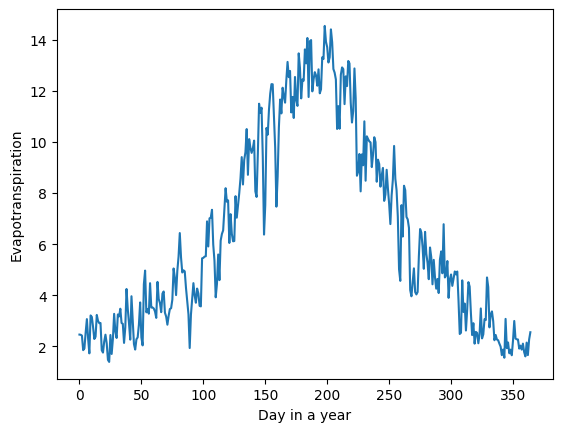

In [409]:
plt.plot(sampled_df["Evapotranspiration"])
plt.xlabel("Day in a year")
plt.ylabel("Evapotranspiration")

In [410]:
df2 = sampled_df.mean(axis = 0, skipna = False)

In [411]:
df2 = sampled_df.describe()

In [412]:
df2

,temperature_2m,relativehumidity_2m_precent,rain_(mm),cloudcover_precent,direct_radiation,windspeed_2m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm,slope_saturation,atmospheric_pressure,...,mean_solar_radiation,sunset_hour_angle,extraterrestrial_radiation,clear_sky_solar_radiation,net_solar,rnl,net_radiation,radiation_term,wind_term,Evapotranspiration
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,16.992797,67.113927,0.093071,27.662443,134.048288,10.032406,17.481484,0.295082,0.090526,101.223557,...,11.581772,1.570796,27.151696,20.360297,20.906806,0.243450,8.430650,3.257853,3.091269,6.349122
std,7.150169,13.308261,0.273899,26.264660,82.489505,4.698078,7.648678,0.095700,0.032106,0.000000,...,7.127093,0.294004,11.473824,8.603900,8.834845,0.196178,3.576823,2.469735,1.818880,3.755444
min,2.825000,37.125000,0.000000,0.000000,0.041667,2.430841,3.112500,0.116583,0.018131,101.223557,...,0.003600,1.146122,11.006765,8.253665,8.475209,-0.244113,3.317944,0.204881,0.415705,1.387426
25%,11.008333,56.416667,0.000000,5.416667,64.500000,6.859335,10.979167,0.208125,0.064448,101.223557,...,5.572800,1.283368,15.579034,11.682281,11.995856,0.122835,4.891546,1.035866,1.731718,3.165159
50%,16.391667,67.958333,0.000000,19.916667,133.583333,8.542225,16.816667,0.320042,0.090470,101.223557,...,11.541600,1.572451,27.295582,20.468193,21.017598,0.309121,8.359884,2.499156,2.599165,5.035446
75%,23.870833,77.250000,0.025000,42.958333,208.833333,11.686736,24.933333,0.378042,0.121616,101.223557,...,18.043200,1.855564,38.618878,28.959215,29.736536,0.377833,12.030087,5.317109,4.193563,9.515689
max,29.904167,93.750000,2.683333,100.000000,275.416667,28.285016,31.554167,0.428875,0.143047,101.223557,...,23.796000,1.995490,43.184489,32.382839,33.252056,0.590939,13.526458,9.989375,9.361093,14.548096


# **Data analysis**



### **Complete data set**

In [413]:
import pandas as pd
import math
import numpy as np
from sklearn.linear_model import LinearRegression
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from lightgbm import LGBMRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import plotly.graph_objects as go
import statistics
from scipy import stats
import plotly.express as px
from sklearn.metrics import mean_squared_error

In [414]:
data = sampled_df[['temperature_2m', 'relativehumidity_2m_precent', 'direct_radiation', 'windspeed_2m', 'Evapotranspiration']].copy()
data.head()

,temperature_2m,relativehumidity_2m_precent,direct_radiation,windspeed_2m,Evapotranspiration
0,11.716667,80.166667,58.041667,8.180715,2.458218
1,11.741667,80.416667,62.375000,4.727674,2.450034
2,10.900000,82.333333,15.333333,2.783001,2.420060
3,11.383333,84.833333,19.416667,14.254701,1.848275
4,13.737500,87.375000,29.208333,24.869373,1.916319


array([[<Axes: title={'center': 'temperature_2m'}>,
        <Axes: title={'center': 'relativehumidity_2m_precent'}>],
       [<Axes: title={'center': 'direct_radiation'}>,
        <Axes: title={'center': 'windspeed_2m'}>],
       [<Axes: title={'center': 'Evapotranspiration'}>, <Axes: >]],
      dtype=object)

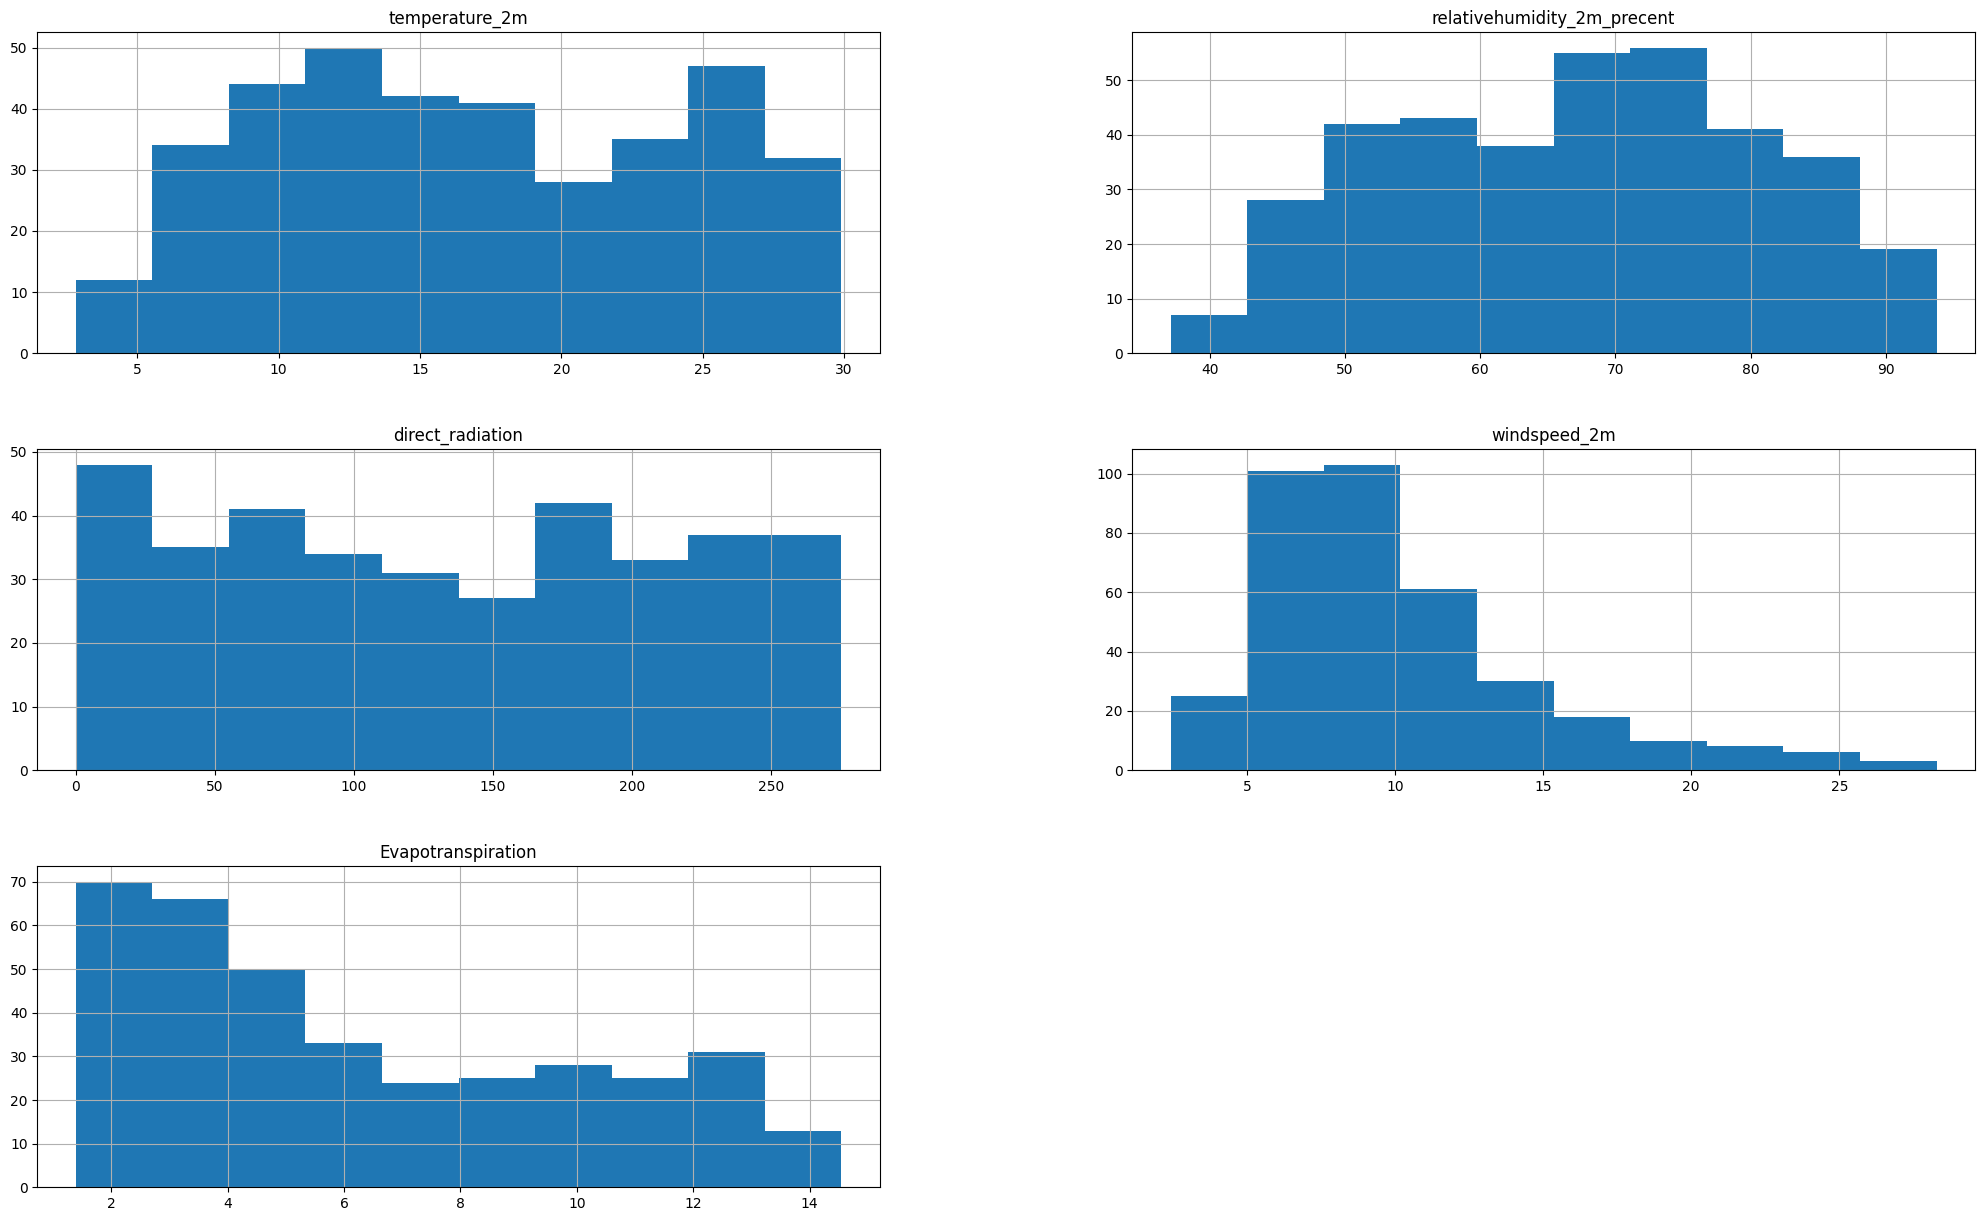

In [415]:
data.hist(figsize=(25,15))

<Axes: >

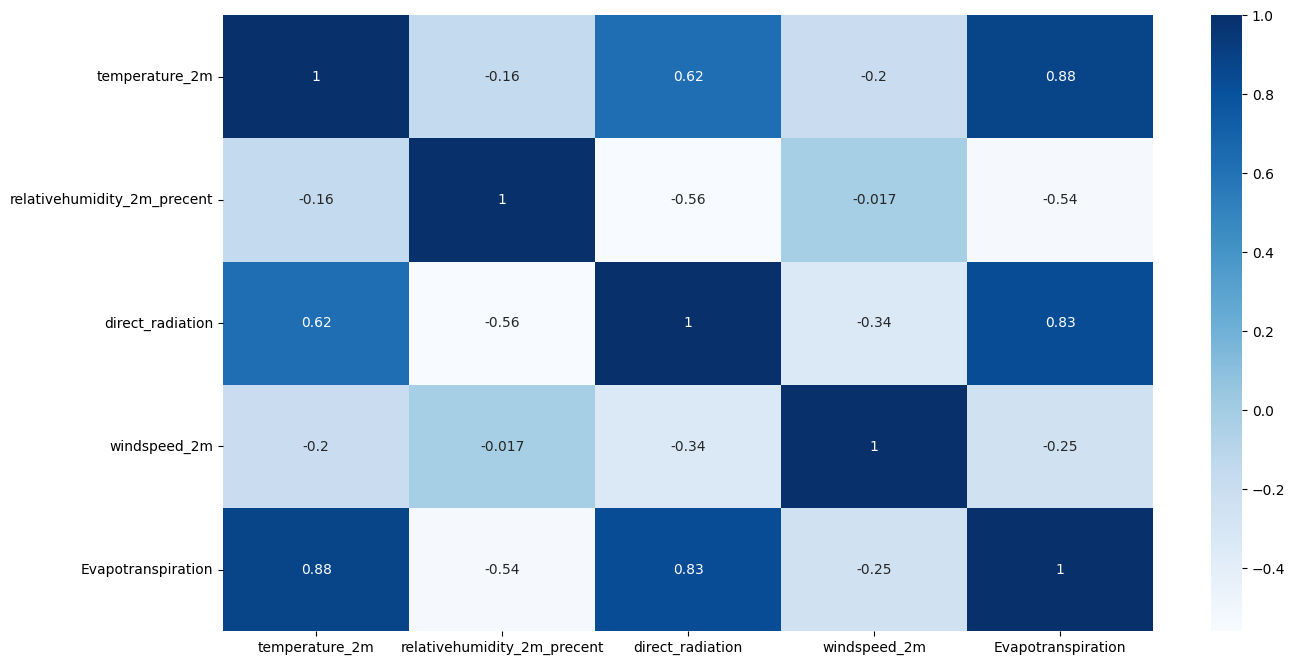

In [416]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap="Blues")

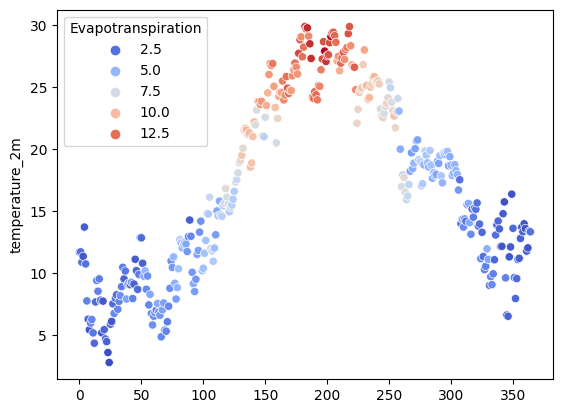

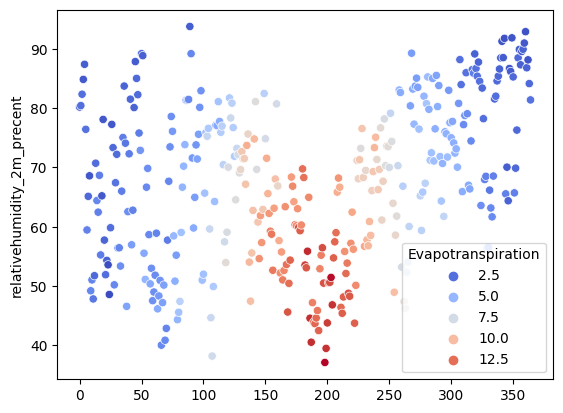

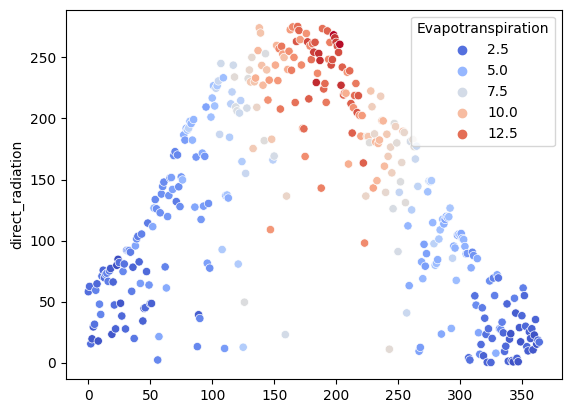

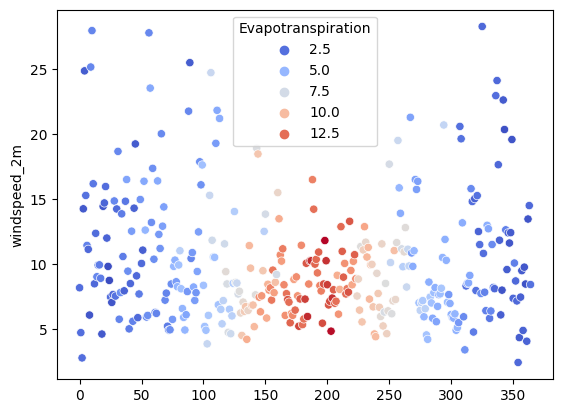

In [417]:
for i in range (len(data.columns)-1):
  y_label=data.columns[i]
  sns.scatterplot(x=data.index, y=y_label, data=data, hue="Evapotranspiration", palette="coolwarm")
  plt.show()

In [418]:
train, test = np.split(data.sample(frac=1), [int(0.8*len(data))])

In [419]:
def scale_dataset(dataframe, oversample = False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  return X, y

In [420]:
X_train, y_train  = scale_dataset(train, oversample=True)
X_test, y_test  = scale_dataset(test, oversample=False)

Linear regression

In [421]:
ln_model = LinearRegression()
ln_model.fit(X_train, y_train)
y_pred = ln_model.predict(X_test)
score = r2_score(y_test, y_pred) # Measuring Model performance by comparing the predicted values to the actual values
print(f'\nModel R² Score: {score:.3f}') # Printing R² score
rms = mean_squared_error(y_test, y_pred, squared=False)
print(f'\nModel RMSE Score: {rms:.3f}')


Model R² Score: 0.951

Model RMSE Score: 0.868


In [422]:
data_ln = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
fig = px.scatter(data_ln, x='y_test', y='y_pred', trendline='ols', trendline_color_override='red')

fig.update_layout(
    title='R² = %0.3f' % score,
    xaxis_title='y_test',
    yaxis_title='y_pred',
    template = 'ggplot2',
    height = 200
)

trendline_results = px.get_trendline_results(fig)
r_squared = trendline_results.iloc[0]['px_fit_results'].rsquared

fig.update_layout(height=1000)
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.show()

Decision Tree

In [423]:
dtr = DecisionTreeRegressor(random_state = 42) # Initializing model
dtr.fit(X_train, y_train) # Fitting model to the training sets
y_pred = dtr.predict(X_test) # Predicting outcomes
score = r2_score(y_test, y_pred) # Evaluating Model performance
print(f'\nModel R² Score: {score:.3f}') # Printing R² score
rms = mean_squared_error(y_test, y_pred, squared=False)
print(f'\nModel RMSE Score: {rms:.3f}')


Model R² Score: 0.948

Model RMSE Score: 0.893


In [424]:
data_dt = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
fig = px.scatter(data_dt, x='y_test', y='y_pred', trendline='ols', trendline_color_override='red')

fig.update_layout(
    title='R² = %0.3f' % score,
    xaxis_title='y_test',
    yaxis_title='y_pred',
    template = 'ggplot2',
    height = 200
)

trendline_results = px.get_trendline_results(fig)
r_squared = trendline_results.iloc[0]['px_fit_results'].rsquared

fig.update_layout(height=1000)
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.show()

Random Forest

In [425]:
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
y_pred = forest_model.predict(X_test)
score = r2_score(y_test, y_pred) # Evaluating Model performance
print(f'\nModel R² Score: {score:.3f}') # Printing R² score
rms = mean_squared_error(y_test, y_pred, squared=False)
print(f'\nModel RMSE Score: {rms:.3f}')


Model R² Score: 0.969

Model RMSE Score: 0.693


In [426]:
data_rf = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
fig = px.scatter(data_rf, x='y_test', y='y_pred', trendline='ols', trendline_color_override='red')

fig.update_layout(
    title='R² = %0.3f' % score,
    xaxis_title='y_test',
    yaxis_title='y_pred',
    template = 'ggplot2',
    height = 200
)

trendline_results = px.get_trendline_results(fig)
r_squared = trendline_results.iloc[0]['px_fit_results'].rsquared

fig.update_layout(height=1000)
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.show()

# **Calculating reference evapotranspiration with limited data**

## **For missing or questionable quality of humidity**

In [427]:
label_series = pd.Series(itertools.chain.from_iterable(itertools.repeat(x, SAMPLE_SIZE) for x in df.index), )
sampled_df_noRH = df.groupby(label_series).mean()

<ipython-input-427-bbaef45c34b8>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [428]:
sampled_df_noRH.head()

,temperature_2m,relativehumidity_2m_precent,rain_(mm),cloudcover_precent,direct_radiation,windspeed_10m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm
0,11.716667,80.166667,0.000000,2.958333,58.041667,10.937500,10.575000,0.395083
1,11.741667,80.416667,0.000000,3.583333,62.375000,6.320833,10.437500,0.390833
2,10.900000,82.333333,0.000000,72.708333,15.333333,3.720833,9.179167,0.388208
3,11.383333,84.833333,0.025000,74.875000,19.416667,19.058333,10.337500,0.385750
4,13.737500,87.375000,0.091667,54.208333,29.208333,33.250000,12.545833,0.388875


Wind speed

In [429]:
sampled_df_noRH["windspeed_10m"] = sampled_df_noRH["windspeed_10m"]*4.87/(math.log(67.8*10-5.42))

In [430]:
sampled_df_noRH.rename(columns = {'windspeed_10m':'windspeed_2m'}, inplace = True)

Slope of saturation vapor pressure curve

In [431]:
sampled_df_noRH["slope_saturation"] = pd.Series()

<ipython-input-431-fa774f08d064>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [432]:
sampled_df_noRH["slope_saturation"]=(4098*(0.6108*2.7183*((17.27*sampled_df_noRH["temperature_2m"])/(sampled_df_noRH["temperature_2m"]+237.3))))/(sampled_df_noRH["temperature_2m"]+273.3)**2

Atmospheric Pressure (P)

In [433]:
sampled_df_noRH["atmospheric_pressure"] = pd.Series()

<ipython-input-433-f527a39b64b7>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [434]:
sampled_df_noRH["atmospheric_pressure"] = 101.3*(((293-(0.00657*6.4))/293)**5.26)

Psychrometric constant (³)

In [435]:
sampled_df_noRH["psychrometric_constant"] = pd.Series()

<ipython-input-435-a1c37bc5fdc4>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [436]:
sampled_df_noRH["psychrometric_constant"] = 0.000665 * sampled_df_noRH["atmospheric_pressure"]

Delta Term (DT) (auxiliary calculation for Radiation Term)

In [437]:
sampled_df_noRH["delta_term"] = pd.Series()

<ipython-input-437-2c9bbeb6ab29>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [438]:
sampled_df_noRH["delta_term"] = sampled_df_noRH["slope_saturation"]/(sampled_df_noRH["psychrometric_constant"]*(1+0.34*sampled_df_noRH["windspeed_2m"]))

Psi Term (PT) (auxiliary calculation for Wind Term)

In [439]:
sampled_df_noRH["psi_term"] = pd.Series()

<ipython-input-439-13eb12260c4b>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [440]:
sampled_df_noRH["psi_term"] = sampled_df_noRH["psychrometric_constant"]/(sampled_df_noRH["slope_saturation"]+sampled_df_noRH["psychrometric_constant"]*(1+0.34*sampled_df_noRH["windspeed_2m"]))

Temperature Term (TT) (auxiliary calculation for Wind Term)

In [441]:
sampled_df_noRH["temperature_term"] = pd.Series()

<ipython-input-441-ad10fea2084a>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [442]:
sampled_df_noRH["temperature_term"] = (900/(sampled_df_noRH["temperature_2m"]+273))*sampled_df_noRH["windspeed_2m"]

Mean saturation vapor pressure derived from air temperature(es)

In [443]:
SAMPLE_SIZE = 24
label_series = pd.Series(itertools.chain.from_iterable(itertools.repeat(x, SAMPLE_SIZE) for x in df.index), )
df_max_noRH = df.groupby(label_series).max()
df_max_noRH.rename(columns = {'temperature_2m':'max_temperature_2m'}, inplace = True)

In [444]:
SAMPLE_SIZE = 24
label_series = pd.Series(itertools.chain.from_iterable(itertools.repeat(x, SAMPLE_SIZE) for x in df.index), )
df_min_noRH = df.groupby(label_series).min()
df_min_noRH.rename(columns = {'temperature_2m':'min_temperature_2m'}, inplace = True)

In [445]:
sampled_df_noRH['max_temperature'] = df_max_noRH['max_temperature_2m'].to_numpy()
sampled_df_noRH['min_temperature'] = df_min_noRH['min_temperature_2m'].to_numpy()

T_max

In [446]:
sampled_df_noRH["t_max_saturation"] = pd.Series()
sampled_df_noRH["t_min_saturation"] = pd.Series()

<ipython-input-446-87948b7a276a>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

<ipython-input-446-87948b7a276a>:2: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [447]:
sampled_df_noRH["t_max_saturation"] = 0.6108 * 2.7183 * ((17.27*sampled_df_noRH['max_temperature'])/(sampled_df_noRH['max_temperature']+237.3))
sampled_df_noRH["t_min_saturation"] = 0.6108 * 2.7183 * ((17.27*sampled_df_noRH['min_temperature'])/(sampled_df_noRH['min_temperature']+237.3))

In [448]:
sampled_df_noRH["t_mean_saturation"] = pd.Series()

<ipython-input-448-3348ac50802d>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [449]:
sampled_df_noRH["t_mean_saturation"] = (sampled_df_noRH["t_max_saturation"]+sampled_df_noRH["t_min_saturation"])/2

**Actual vapor pressure (ea) derived from relative humidity**

For missing or questionable quality of humidity
data, the ea can be obtained by assuming when the air temperature is close to Tmin, the air is nearly saturated with water vapor and the relative humidity is near 100%, in other words, dewpoint temperature (Tdew) is near the daily minimum temperature (Tmin). If Tmin is used to represent Tdew then:

# \begin{equation}
e_a = e_{(T_{min})} = 0.6108exp\left[\frac{17.27 \; T_{min}}{T_{min}+237.3}\right]
\end{equation}

In [450]:
sampled_df_noRH["vapor_pressure"] = pd.Series()

<ipython-input-450-018000bfe92a>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [451]:
sampled_df_noRH["vapor_pressure"] = 0.6108*2.7183*((17.27*sampled_df_noRH['min_temperature'])/(sampled_df_noRH['min_temperature']+237.3))

The inverse relative distance Earth-Sun (dr) and solar declination

In [452]:
sampled_df_noRH["relative_dis_earth_sun"] = pd.Series()

<ipython-input-452-69ec2f04311a>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [453]:
sampled_df_noRH['index1'] = sampled_df_noRH.index

In [454]:
sampled_df_noRH["relative_dis_earth_sun"] = 1+0.0033*np.cos(2*math.pi/365*(sampled_df_noRH['index1']+1))

In [455]:
sampled_df_noRH["solar_declination"] = pd.Series()

<ipython-input-455-255db7a59a25>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [456]:
sampled_df_noRH["solar_declination"] = 0.409*np.sin((2*math.pi/365)*(sampled_df_noRH['index1']+1)-1.39)

Conversion of latitude in degrees to radians

In [457]:
sampled_df_noRH["latitude_in_radians"] = pd.Series()

<ipython-input-457-8c2aa55f57f4>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [458]:
sampled_df_noRH["latitude_in_radians"] = 43.55*math.pi/180

Mean daily solar radiation

In [459]:
SAMPLE_SIZE = 24
label_series = pd.Series(itertools.chain.from_iterable(itertools.repeat(x, SAMPLE_SIZE) for x in df.index), )
df_solar_noRH = df.groupby(label_series).mean()

<ipython-input-459-c2aee81054dd>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [460]:
sampled_df_noRH['mean_solar_radiation'] = df_solar_noRH['direct_radiation'].to_numpy()

In [461]:
sampled_df_noRH['mean_solar_radiation'] = sampled_df_noRH['mean_solar_radiation'] * 0.0864

Sunset hour angle (…s)

In [462]:
sampled_df_noRH["sunset_hour_angle"] = pd.Series()



<ipython-input-462-fb602d0355bd>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [463]:
sampled_df_noRH["sunset_hour_angle"] = np.arccos(-np.tan(sampled_df_noRH["latitude_in_radians"])*np.tan(sampled_df_noRH["solar_declination"]))

Extraterrestrial radiation (Ra)

In [464]:
sampled_df_noRH["extraterrestrial_radiation"] = pd.Series()

<ipython-input-464-9a3695f7024b>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [465]:
sampled_df_noRH["extraterrestrial_radiation"] = ((24*60)/math.pi)*0.0820*sampled_df_noRH["relative_dis_earth_sun"]*((sampled_df_noRH["sunset_hour_angle"]*np.sin(sampled_df_noRH["latitude_in_radians"])*np.sin(sampled_df_noRH["solar_declination"]))+(np.cos(sampled_df_noRH["latitude_in_radians"])*np.cos(sampled_df_noRH["solar_declination"])*np.sin(sampled_df_noRH["sunset_hour_angle"])))

Clear sky solar radiation (Rso)

In [466]:
sampled_df_noRH["clear_sky_solar_radiation"] = pd.Series()

<ipython-input-466-1d1631f86478>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [467]:
sampled_df_noRH["clear_sky_solar_radiation"] = (0.75-0.00002*6.4)*sampled_df_noRH["extraterrestrial_radiation"]

Net solar or net shortwave radiation (Rns)

In [468]:
sampled_df_noRH["net_solar"] = pd.Series()

<ipython-input-468-27fe874aa1bc>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [469]:
sampled_df_noRH["net_solar"] = (1-0.23)*sampled_df_noRH["extraterrestrial_radiation"]

Net outgoing long wave solar radiation (Rnl)

In [470]:
sampled_df_noRH["rnl"] = pd.Series()

<ipython-input-470-6481d9acda0b>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [471]:
sampled_df_noRH["rnl"] = 0.4903*0.000000001*(((sampled_df_noRH["max_temperature"]+273.15)**4+(sampled_df_noRH["min_temperature"]+273.15)**4)/2)*(0.34-0.14*np.sqrt(sampled_df_noRH["vapor_pressure"]))*(1.35*(sampled_df_noRH['mean_solar_radiation']/sampled_df_noRH["clear_sky_solar_radiation"])-0.35)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

invalid value encountered in sqrt



Net radiation (Rn)

In [472]:
sampled_df_noRH["net_radiation"] = pd.Series()

<ipython-input-472-476466b99699>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [473]:
sampled_df_noRH["net_radiation"] = 0.408*(sampled_df_noRH["net_solar"] - sampled_df_noRH["rnl"])

Final Step – Overall ET equation

In [474]:
sampled_df_noRH["radiation_term"] = pd.Series()

<ipython-input-474-02483546b329>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [475]:
sampled_df_noRH["radiation_term"] = sampled_df_noRH["delta_term"]*sampled_df_noRH["net_radiation"]

FS2. Wind term (ET)

In [476]:
sampled_df_noRH["wind_term"] = pd.Series()

<ipython-input-476-e418cbc20543>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [477]:
sampled_df_noRH["wind_term"] = sampled_df_noRH["temperature_term"]*sampled_df_noRH["psi_term"]*(sampled_df_noRH["t_mean_saturation"]-sampled_df_noRH["vapor_pressure"])

Final Reference Evapotranspiration Value

In [478]:
sampled_df_noRH["Evapotranspiration"] = pd.Series()

<ipython-input-478-85591fd91fde>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [479]:
sampled_df_noRH["Evapotranspiration"] = sampled_df_noRH["wind_term"]+sampled_df_noRH["radiation_term"]

## **No wind speed data**

In case there is no wind speed data, it is proposed to use the avarage wind speed for the 2000 stations in the world. That is 2ms.

In [480]:
SAMPLE_SIZE = 24
label_series = pd.Series(itertools.chain.from_iterable(itertools.repeat(x, SAMPLE_SIZE) for x in df.index), )
sampled_df_noWS = df.groupby(label_series).mean()

<ipython-input-480-22b52d8a79cb>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



**Wind speed**

In [481]:
sampled_df_noWS["windspeed_2m"] = 2

Slope of saturation vapor pressure curve

In [482]:
sampled_df_noWS["slope_saturation"] = pd.Series()

<ipython-input-482-3e439e21666b>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [483]:
sampled_df_noWS["slope_saturation"]=(4098*(0.6108*2.7183*((17.27*sampled_df_noWS["temperature_2m"])/(sampled_df_noWS["temperature_2m"]+237.3))))/(sampled_df_noWS["temperature_2m"]+273.3)**2

Atmospheric Pressure (P)

In [484]:
sampled_df_noWS["atmospheric_pressure"] = pd.Series()

<ipython-input-484-abfddc533c9e>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [485]:
sampled_df_noWS["atmospheric_pressure"] = 101.3*(((293-(0.00657*6.4))/293)**5.26)

Psychrometric constant (³)

In [486]:
sampled_df_noWS["psychrometric_constant"] = pd.Series()

<ipython-input-486-7f46477f743d>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [487]:
sampled_df_noWS["psychrometric_constant"] = 0.000665 * sampled_df_noWS["atmospheric_pressure"]

Delta Term (DT) (auxiliary calculation for Radiation Term)

In [488]:
sampled_df_noWS["delta_term"] = pd.Series()

<ipython-input-488-d73c1b393ce0>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [489]:
sampled_df_noWS["delta_term"] = sampled_df_noWS["slope_saturation"]/(sampled_df_noWS["psychrometric_constant"]*(1+0.34*sampled_df_noWS["windspeed_2m"]))

Psi Term (PT) (auxiliary calculation for Wind Term)

In [490]:
sampled_df_noWS["psi_term"] = pd.Series()

<ipython-input-490-f062df1b0a76>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [491]:
sampled_df_noWS["psi_term"] = sampled_df_noWS["psychrometric_constant"]/(sampled_df_noWS["slope_saturation"]+sampled_df_noWS["psychrometric_constant"]*(1+0.34*sampled_df_noWS["windspeed_2m"]))

Temperature Term (TT) (auxiliary calculation for Wind Term)

In [492]:
sampled_df_noWS["temperature_term"] = pd.Series()

<ipython-input-492-137003d59a9e>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [493]:
sampled_df_noWS["temperature_term"] = (900/(sampled_df_noWS["temperature_2m"]+273))*sampled_df_noWS["windspeed_2m"]

Mean saturation vapor pressure derived from air temperature(es)

In [494]:
SAMPLE_SIZE = 24
label_series = pd.Series(itertools.chain.from_iterable(itertools.repeat(x, SAMPLE_SIZE) for x in df.index), )
df_max_noWS = df.groupby(label_series).max()
df_max_noWS.rename(columns = {'temperature_2m':'max_temperature_2m'}, inplace = True)

In [495]:
SAMPLE_SIZE = 24
label_series = pd.Series(itertools.chain.from_iterable(itertools.repeat(x, SAMPLE_SIZE) for x in df.index), )
df_min_noWS = df.groupby(label_series).min()
df_min_noWS.rename(columns = {'temperature_2m':'min_temperature_2m'}, inplace = True)


In [496]:
sampled_df_noWS['max_temperature'] = df_max_noWS['max_temperature_2m'].to_numpy()
sampled_df_noWS['min_temperature'] = df_min_noWS['min_temperature_2m'].to_numpy()

In [497]:
sampled_df_noWS["t_max_saturation"] = pd.Series()
sampled_df_noWS["t_min_saturation"] = pd.Series()

<ipython-input-497-44c7012971f9>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

<ipython-input-497-44c7012971f9>:2: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [498]:
sampled_df_noWS["t_max_saturation"] = 0.6108 * 2.7183 * ((17.27*sampled_df_noWS['max_temperature'])/(sampled_df_noWS['max_temperature']+237.3))
sampled_df_noWS["t_min_saturation"] = 0.6108 * 2.7183 * ((17.27*sampled_df_noWS['min_temperature'])/(sampled_df_noWS['min_temperature']+237.3))

In [499]:
sampled_df_noWS["t_mean_saturation"] = pd.Series()

<ipython-input-499-567f17ec4ccf>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [500]:
sampled_df_noWS["t_mean_saturation"] = (sampled_df_noWS["t_max_saturation"]+sampled_df_noWS["t_min_saturation"])/2

Actual vapor pressure (ea) derived from relative humidity

In [501]:
sampled_df_noWS["vapor_pressure"] = pd.Series()

<ipython-input-501-8ebeaa22e4f5>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [502]:
sampled_df_noWS["vapor_pressure"] = (sampled_df_noWS["relativehumidity_2m_precent"]/100)*((sampled_df_noWS["t_min_saturation"]+sampled_df_noWS["t_max_saturation"])/2)

The inverse relative distance Earth-Sun (dr) and solar declination

In [503]:
sampled_df_noWS["relative_dis_earth_sun"] = pd.Series()

<ipython-input-503-d8d6a38cda67>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [504]:
sampled_df_noWS['index1'] = sampled_df.index

In [505]:
sampled_df_noWS["relative_dis_earth_sun"] = 1+0.0033*np.cos(2*math.pi/365*(sampled_df_noWS['index1']+1))

In [506]:
sampled_df_noWS["solar_declination"] = pd.Series()

<ipython-input-506-672f3981c553>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [507]:
sampled_df_noWS["solar_declination"] = 0.409*np.sin((2*math.pi/365)*(sampled_df_noWS['index1']+1)-1.39)

Conversion of latitude in degrees to radians

In [508]:
sampled_df_noWS["latitude_in_radians"] = pd.Series()

<ipython-input-508-fcaff7199276>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [509]:
sampled_df_noWS["latitude_in_radians"] = 43.55*math.pi/180

Mean daily solar radiation

In [510]:
SAMPLE_SIZE = 24
label_series = pd.Series(itertools.chain.from_iterable(itertools.repeat(x, SAMPLE_SIZE) for x in df.index), )
df_solar_noWS = df.groupby(label_series).mean()

<ipython-input-510-a9cae747eca9>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [511]:
sampled_df_noWS['mean_solar_radiation'] = df_solar_noWS['direct_radiation'].to_numpy()

In [512]:
sampled_df_noWS['mean_solar_radiation'] = sampled_df_noWS['mean_solar_radiation'] * 0.0864

Sunset hour angle (…s)

In [513]:
sampled_df_noWS["sunset_hour_angle"] = pd.Series()

<ipython-input-513-c74cd71b33a5>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [514]:
sampled_df_noWS["sunset_hour_angle"] = np.arccos(-np.tan(sampled_df_noWS["latitude_in_radians"])*np.tan(sampled_df_noWS["solar_declination"]))

Extraterrestrial radiation (Ra)

In [515]:
sampled_df_noWS["extraterrestrial_radiation"] = pd.Series()

<ipython-input-515-76498dfbbe4b>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [516]:
sampled_df_noWS["extraterrestrial_radiation"] = ((24*60)/math.pi)*0.0820*sampled_df_noWS["relative_dis_earth_sun"]*((sampled_df_noWS["sunset_hour_angle"]*np.sin(sampled_df_noWS["latitude_in_radians"])*np.sin(sampled_df_noWS["solar_declination"]))+(np.cos(sampled_df_noWS["latitude_in_radians"])*np.cos(sampled_df_noWS["solar_declination"])*np.sin(sampled_df_noWS["sunset_hour_angle"])))

Clear sky solar radiation (Rso)

In [517]:
sampled_df_noWS["clear_sky_solar_radiation"] = pd.Series()

<ipython-input-517-c918b49c784b>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [518]:
sampled_df_noWS["clear_sky_solar_radiation"] = (0.75-0.00002*6.4)*sampled_df_noWS["extraterrestrial_radiation"]

Net solar or net shortwave radiation (Rns)

In [519]:
sampled_df_noWS["net_solar"] = pd.Series()

<ipython-input-519-e56c6e367ed0>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [520]:
sampled_df_noWS["net_solar"] = (1-0.23)*sampled_df_noWS["extraterrestrial_radiation"]

Net outgoing long wave solar radiation (Rnl)

In [521]:
sampled_df_noWS["rnl"] = pd.Series()

<ipython-input-521-adf386212044>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [522]:
sampled_df_noWS["rnl"] = 0.4903*0.000000001*(((sampled_df_noWS["max_temperature"]+273.15)**4+(sampled_df_noWS["min_temperature"]+273.15)**4)/2)*(0.34-0.14*np.sqrt(sampled_df_noWS["vapor_pressure"]))*(1.35*(sampled_df_noWS['mean_solar_radiation']/sampled_df_noWS["clear_sky_solar_radiation"])-0.35)

Net radiation (Rn)

In [523]:
sampled_df_noWS["net_radiation"] = pd.Series()

<ipython-input-523-0d343e015565>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [524]:
sampled_df_noWS["net_radiation"] = 0.408*(sampled_df_noWS["net_solar"] - sampled_df_noWS["rnl"])

Final Step – Overall ET equation

In [525]:
sampled_df_noWS["radiation_term"] = pd.Series()

<ipython-input-525-004379d7f92e>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [526]:
sampled_df_noWS["radiation_term"] = sampled_df_noWS["delta_term"]*sampled_df_noWS["net_radiation"]

FS2. Wind term (ET)

In [527]:
sampled_df_noWS["wind_term"] = pd.Series()

<ipython-input-527-9c2d10ba0c70>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [528]:
sampled_df_noWS["wind_term"] = sampled_df_noWS["temperature_term"]*sampled_df_noWS["psi_term"]*(sampled_df_noWS["t_mean_saturation"]-sampled_df_noWS["vapor_pressure"])


Final Reference Evapotranspiration Value

In [529]:
sampled_df_noWS["Evapotranspiration"] = pd.Series()

<ipython-input-529-72c42745a059>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [530]:
sampled_df_noWS["Evapotranspiration"] = sampled_df_noWS["wind_term"]+sampled_df_noWS["radiation_term"]

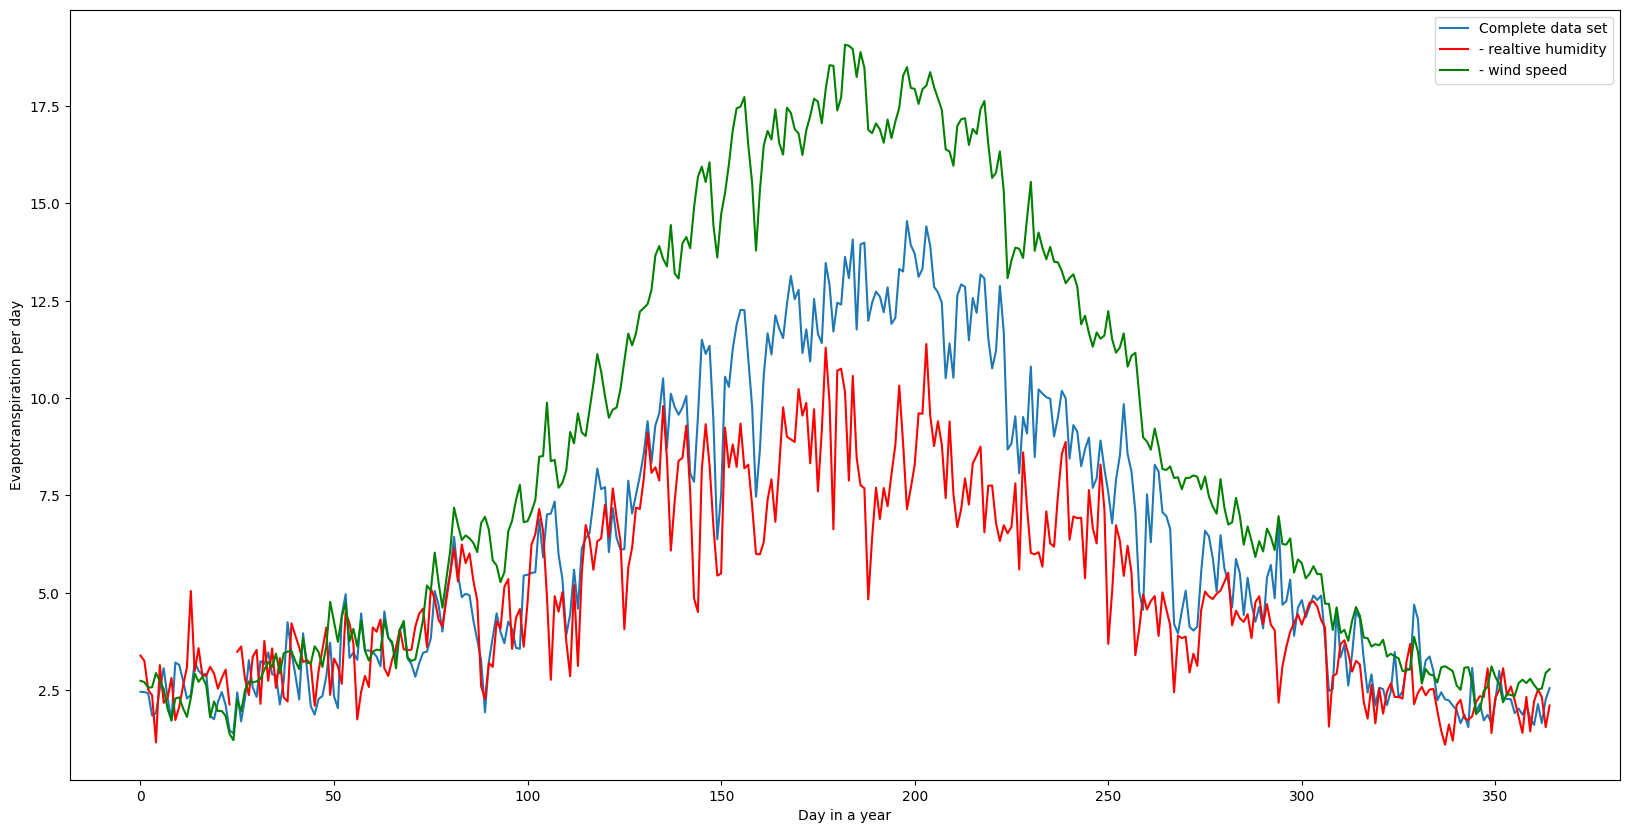

In [531]:
plt.figure(figsize=(20,10))
plt.plot(sampled_df["Evapotranspiration"], label="Complete data set")
plt.plot(sampled_df_noRH["Evapotranspiration"], color="red", label="- realtive humidity")
plt.plot(sampled_df_noWS["Evapotranspiration"], color="green", label="- wind speed")
plt.xlabel("Day in a year")
plt.ylabel("Evapotranspiration per day")
plt.legend()
plt.show()